## Define parameters

In [1]:
# Define parameters

# Parameter values
m = 0.01
L = 1
g = 10
k = 10

p = [m, L, g, k]

# Initial conditions w0 = [x1,vx1,y1,vy1, x2,vx2,y2,vy2, ...]
N = 20
w0 = [
    0,    0,  1, 0,
    0.02, 0,  2, 0,
    0,    0,  3, 0,
    0,    0,  4, 0,
    0,    0,  5, 0,
    0,    0,  6, 0,
    0,    0,  7, 0,
    0,    0,  8, 0,
    0,    0,  9, 0,
    0,    0, 10, 0,
    0,    0, 11, 0,
    0.02, 0, 12, 0,
    0,    0, 13, 0,
    0,    0, 14, 0,
    0,    0, 15, 0,
    0,    0, 16, 0,
    0,    0, 17, 0,
    0,    0, 18, 0,
    0,    0, 19, 0,
    0,    0, 20, 0
]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 100.0
numpoints = 5000

## Solve

In [2]:
# force of 2d-spring with known positions of ends of spring (x_p, x, y_p, y) and spring parameters (L, k, m)
def F_x(x_p, x, y_p, y, L, k, m):
    if abs(x_p - x) < 0.0001: # preventing division by 0
        return 0
    return k/m * (x_p - x) * (1 - L / ((x_p - x)*(x_p - x) + (y_p - y)*(y_p - y))**0.5 )

def F_y(x_p, x, y_p, y, L, k, m):
    if abs(y_p - y) < 0.0001: # preventing division by 0
        return 0
    return k/m * (y_p - y) * (1 - L / ((x_p - x)*(x_p - x) + (y_p - y)*(y_p - y))**0.5 )

In [3]:
# force of 2d-spring with known positions of ends of spring (x_p, x, y_p, y) and spring parameters (L, k, m)
def F_x(x_p, x, y_p, y, L, k, m):
    if abs(x_p - x) < 0.0001: # preventing division by 0
        return 0
    return k/m * (x_p - x) * (1 - L / ((x_p - x)*(x_p - x) + (y_p - y)*(y_p - y))**0.5 )

def F_y(x_p, x, y_p, y, L, k, m):
    if abs(y_p - y) < 0.0001: # preventing division by 0
        return 0
    return k/m * (y_p - y) * (1 - L / ((x_p - x)*(x_p - x) + (y_p - y)*(y_p - y))**0.5 )

In [4]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,vx1,y1,vy1, x2,vx2,y2,vy2, ...]
        t :  time
        p :  vector of the parameters:
                  p = [m,L,g,k]
    """
    
    m, L, g, k = p
    
    # defining position of previous(p) segment
    # for the first segment, position of a previous segment is a position where the spring is attached to a seiling
    x_p = 0
    y_p = 0
    
    # Create f = w':
    f = []
    for i in range(0, N):
        x  = w[4*i + 0]
        vx = w[4*i + 1]
        y  = w[4*i + 2]
        vy = w[4*i + 3]
        
        # defining position of next(n) segment
        if (i == N-1):
            # last segment has no next segment so F_x and F_y are 0.
            # F_x and F_y are conveniently hardcoded to return 0, if positions of ends of spring are the same :P
            x_n = x
            y_n = y
        else:
            x_n = w[4*(i+1) + 0]
            y_n = w[4*(i+1) + 2]
        
        f += [
            vx,
            F_x(x_p, x, y_p, y, L, k, m) - F_x(x, x_n, y, y_n, L, k, m),
            vy,
            g + F_y(x_p, x, y_p, y, L, k, m) - F_y(x, x_n, y, y_n, L, k, m)
        ]
        
        x_p = x
        y_p = y
    return f

In [5]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 100.0
numpoints = 5000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]


# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('springs.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, file=f, end=' ')
        for i in range(0, N):
            print(w1[i*4 + 0], w1[i*4 + 2], file=f, end=' ')
        print("", file=f)

## Load solution from file

In [6]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties

S = loadtxt('springs.dat', unpack=True)

## Plot

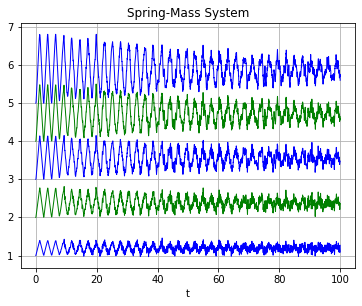

In [7]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties

t, x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 = S[0:11]

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(t, y1, 'b', linewidth=lw)
plot(t, y2, 'g', linewidth=lw)
plot(t, y3, 'b', linewidth=lw)
plot(t, y4, 'g', linewidth=lw)
plot(t, y5, 'b', linewidth=lw)

title('Spring-Mass System')
savefig('springs.png', dpi=300)

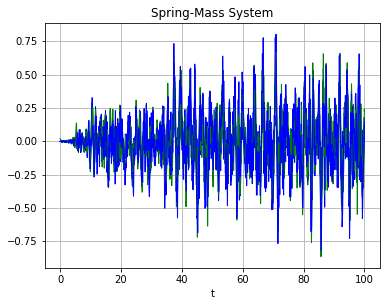

In [8]:
figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)
plot(t, x3, 'b', linewidth=lw)
plot(t, x4, 'g', linewidth=lw)
plot(t, x5, 'b', linewidth=lw)

title('Spring-Mass System')
savefig('springsX.png', dpi=300)

## Animate loaded solution

In [9]:
import sys
import math
import matplotlib
import random
matplotlib.use('Qt5Agg')

from PyQt5 import QtCore, QtWidgets

from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure

In [10]:
class MplCanvas(FigureCanvas):

    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(MplCanvas, self).__init__(fig)

In [11]:
def addLines(xxdata, xydata):
    alpha = 0.05
    n = 5
    xdata = [xxdata[0]]
    ydata = [xydata[0]]
    for i in range(1, len(xxdata)):
        dx = xxdata[i] - xxdata[i-1]
        dy = xydata[i] - xydata[i-1]
        angle = math.atan2(dy, dx)
        for j in range(1, n):
            xdata.append(xxdata[i-1] + j * dx/n + alpha * math.sin(angle) if j % 2 == 0 else xxdata[i-1] + j * dx/n - alpha * math.sin(angle))
            ydata.append(xydata[i-1] + j * dy/n - alpha * math.cos(angle) if j % 2 == 0 else xydata[i-1] + j * dy/n + alpha * math.cos(angle))
        xdata.append(xxdata[i])
        ydata.append(xydata[i])
    return [xdata, ydata]

In [12]:
class MainWindow(QtWidgets.QMainWindow):

    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)

        self.canvas = MplCanvas(self, width=5, height=4, dpi=100)
        self.setCentralWidget(self.canvas)

        self.i = 0
        
        self.len = 0.1
        self.dt = 0.05
        self.g = 9.8
        self.k = 50
        self.xdata = []
        self.ydata = []
        self.xxdata = [0.5, 0.25]
        self.xydata = [1, 0.9]
        self.vxdata = [0 for i in range(10, 0, -1)]
        self.vydata = [0 for i in range(10, 0, -1)]
        # self.xxdata = [random.randint(1, 10) * 0.1  for i in range(10, 0, -1)]
        # self.xydata = [i * 0.1 for i in range(10, 0, -1)]
        # self.vxdata = [0 for i in range(10, 0, -1)]
        # self.vydata = [0 for i in range(10, 0, -1)]
        self.update_plot()

        self.show()

        # Setup a timer to trigger the redraw by calling update_plot.
        self.timer = QtCore.QTimer()
        self.timer.setInterval(10)
        self.timer.timeout.connect(self.update_plot)
        self.timer.start()

    def update_plot(self):
        # Drop off the first y element, append a new one.
        # self.ydata = self.ydata[1:] + [random.randint(0, 10)]
        prev_angle = 0
        prev_len_diff = 0
        
        nextx = [0.0]
        nexty = [0.0]
        for i in range(0, N):
            nextx = nextx + [ S[1 + 2*i][self.i]]
            nexty = nexty + [-S[2 + 2*i][self.i]]
        self.i = self.i + 1
        self.i = self.i % numpoints
        
        self.xxdata = nextx
        self.xydata = nexty
        self.xdata, self.ydata = addLines(self.xxdata, self.xydata)
        
        # Clear the canvas
        self.canvas.axes.cla()
        # Set axes size
        self.canvas.axes.set_xbound(-1, 1)
        self.canvas.axes.set_ybound(0, -25)
        # Draw
        self.canvas.axes.plot(self.xdata, self.ydata, 'r', scalex=False, scaley=False, )
        # Trigger the canvas to update and redraw.
        self.canvas.draw()

In [13]:
app = QtWidgets.QApplication(sys.argv)
w = MainWindow()
app.exec_()